### Introducción a la Programación para Ciencia de Datos

### R (2da parte)
_Rocío Romero Zaliz_ - rocio@decsai.ugr.es

# Programming Structures

* R is a block-structured language (like C, C++, Python, Perl, and so on).
* Blocks are delineated by braces, while statements are separated by newline characters or, optionally, by semicolons.
* As with many scripting languages, we do not “declare” variables in R, therefore we have to take care of possible variable scoping issues.

## Basic R operators
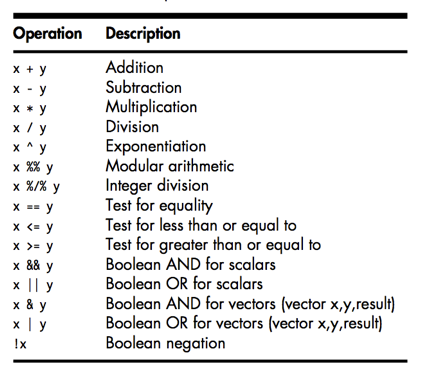

## Control Statements: if-else

The syntax for if-else looks like:

>`if (r == 4) {  
     x <- 1  
 } else {  
     x <- 3  
     y <- 4 
 }
`

In [2]:
r <- 3
x <- 0
y <- 0

if (r == 4) {  
 x <- 1  
} else {  
 x <- 3  
 y <- 4 
}

print(x)
print(y)

[1] 3
[1] 4


An if-else statement works as a function call, and as such, it returns the last value assigned.

In [3]:
print(if (x == 2) y <- x else y <- x+1)

[1] 4


In [4]:
y <- if(x == 2) x else x+1
y

[1] 4

In [ ]:
# Error!
x <- 1:10
y <- if (x == 2) x else x+1
y

When working with vectors, use the `ifelse` function.

The form is: `ifelse(b,u,v)` where `b` is a Boolean vector, and `u` and `v` are vectors.

The return value is itself a vector: element `i` is `u[i]` if `b[i]` is true, or `v[i]` if `b[i]` is false.

In [12]:
x <- 1:10
y <- ifelse(x == 2, x, x+1)
y

[1]  2  2  4  5  6  7  8  9 10 11

In [ ]:
x == 2

In [ ]:
x <- 1:10
ifelse(x %% 2 == 0, "par", "impar")

In [ ]:
x <- c(5,2,9,12)
ifelse(x > 6, 2*x, 3*x)

## Control Statements: loops

One of the major themes of R programming is to avoid loops if possible; if not, keep loops simple.

We have:
* For loops
* While loops
* Repeat loops

### For loops

In [5]:
# Just an example, please do not code like this in R...
for (n in 1:5) print(n) 

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5


In [6]:
# In R use print(1:5)
print(1:5)

[1] 1 2 3 4 5


In [11]:
# Just an example, please do not code like this in R...
print(x)

k <- 0
for (n in x) {
   if (n %% 2 == 1) k <- k+1  
} 
k

[1] 3


[1] 1

In [8]:
# Just an example, please do not code like this in R...
k <- 0
for (i in 1:length(x)) {
   if (x[i] %% 2 == 1) k <- k+1
} 
k

[1] 1

In [ ]:
# In R use...
sum(x %% 2 == 1)

In [ ]:
# This is why:
k <- 0
x <- 1:10000000
system.time(for (n in x) if (n %% 2 == 1) k <- k+1)
system.time(sum(x %% 2 == 1))

### While loops

In [14]:
# Just an example, please do not code like this in R...
i <- 1
while ((i < length(x)) && (x[i] != 9)) {
    i <- i+1
}
i

[1] 9

In [16]:
# In R use...
which(x == 9)

[1] 9

In [ ]:
# This is why:
i <- 1
x <- 1:10000000
system.time(while ((i < length(x)) && (x[i] != 10000000)) i <- i+1)
system.time(which(x == 10000000)[1])

### Repeat loops

In [ ]:
# Just an example, please do not code like this in R...
# I honestly hate repeats in R...

i <- 1
repeat {
    i <- i+1
    if ((i > length(x)) || (x[i] == 9)) break
}
i 

In [ ]:
# In R use...
which(x == 9)[1]

In [ ]:
# This is why:
i <- 1
x <- 1:10000000
system.time(repeat {
    i <- i+1
    if ((i > length(x)) || (x[i] == 10000000)) break
    })
system.time(which(x == 10000000)[1])

### Looping: the R way

In R you have more options when doing repeating calculations:

![Apply](applies.png)

#### The apply function

This is the general form of apply  for matrices: 

`apply(m, dimcode, f, fargs)` 

where:
* `m` is the matrix. 
* `dimcode` is the dimension, equal to 1 if the function applies to rows or 2 for columns.
* `f` is the function to be applied. 
* `fargs` is an optional set of arguments to be supplied to `f`. 

Apply over the margins of an array (e.g., the rows or columns of a matrix).

In [17]:
z <- matrix(c(1,1,2,2,3,3), nrow=3, byrow=TRUE)
z

1,1
2,2
3,3


In [18]:
apply(z, 1, mean)

[1] 1 2 3

In [19]:
apply(z, 2, mean)

[1] 2 2

In [20]:
apply(z, 1:2, mean)

1,1
2,2
3,3


#### The lapply function

Returns a list of the same length as the input data X, each element of which is the result of applying a function to the corresponding element of X.

In [21]:
w <- list(vector=c(1,2,3), matriz=matrix(1,nrow=2,ncol=2))
w

1,1
1,1


In [22]:
lapply(w, mean)

$vector
[1] 2

$matriz
[1] 1

In [23]:
suma <- function(x = 1, y = 5) {
    x + y
}

In [24]:
lapply(1:10, suma, x = 2)

[[1]]
[1] 3

[[2]]
[1] 4

[[3]]
[1] 5

[[4]]
[1] 6

[[5]]
[1] 7

[[6]]
[1] 8

[[7]]
[1] 9

[[8]]
[1] 10

[[9]]
[1] 11

[[10]]
[1] 12

#### The sapply function

Apply over an object and return a simplified object (an array) if possible.

In [25]:
z

1,1
2,2
3,3


In [26]:
out1 <- lapply(z, mean)
print(out1)

[[1]]
[1] 1

[[2]]
[1] 2

[[3]]
[1] 3

[[4]]
[1] 1

[[5]]
[1] 2

[[6]]
[1] 3



In [27]:
out <- sapply(z, mean)
print(out)

[1] 1 2 3 1 2 3


In [ ]:
?sapply

In [28]:
out <- unlist(lapply(z, mean))
print(out)
class(out)

[1] 1 2 3 1 2 3


[1] "numeric"

In [29]:
df1 <- data.frame(uno=1:4, dos=c("hola", "mundo", "muy", "cruel"))
df1

uno,dos
1,hola
2,mundo
3,muy
4,cruel


In [30]:
apply(df1, 1, mean)

Warning message in mean.default(newX[, i], ...):
"argument is not numeric or logical: returning NA"Warning message in mean.default(newX[, i], ...):
"argument is not numeric or logical: returning NA"Warning message in mean.default(newX[, i], ...):
"argument is not numeric or logical: returning NA"Warning message in mean.default(newX[, i], ...):
"argument is not numeric or logical: returning NA"

[1] NA NA NA NA

In [31]:
apply(df1, 2, mean)

Warning message in mean.default(newX[, i], ...):
"argument is not numeric or logical: returning NA"Warning message in mean.default(newX[, i], ...):
"argument is not numeric or logical: returning NA"

uno dos 
 NA  NA

In [32]:
apply(df1, 1:2, mean)

Warning message in mean.default(newX[, i], ...):
"argument is not numeric or logical: returning NA"Warning message in mean.default(newX[, i], ...):
"argument is not numeric or logical: returning NA"Warning message in mean.default(newX[, i], ...):
"argument is not numeric or logical: returning NA"Warning message in mean.default(newX[, i], ...):
"argument is not numeric or logical: returning NA"Warning message in mean.default(newX[, i], ...):
"argument is not numeric or logical: returning NA"Warning message in mean.default(newX[, i], ...):
"argument is not numeric or logical: returning NA"Warning message in mean.default(newX[, i], ...):
"argument is not numeric or logical: returning NA"Warning message in mean.default(newX[, i], ...):
"argument is not numeric or logical: returning NA"

uno,dos
NA,NA
NA,NA
NA,NA
NA,NA


In [33]:
df1

uno,dos
1,hola
2,mundo
3,muy
4,cruel


In [34]:
as.list(df1)

$uno
[1] 1 2 3 4

$dos
[1] hola  mundo muy   cruel
Levels: cruel hola mundo muy

In [35]:
lapply(df1, mean)

Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"

$uno
[1] 2.5

$dos
[1] NA

# Performance Enhancement: Speed and Memory

* In order to have a fast-running program, you may need to use more memory space.
* On the other hand, in order to conserve memory space, you might need to settle for slower code.
* R is an interpreted language.
 * Many of the commands are written in C and thus do run in fast machine code. But other commands, and your own R code, are pure R and thus interpreted.
* All objects in an R session are stored in memory.
 * More precisely, all objects are stored in R’s memory address space.
* Optimize your R code through vectorization, use of byte-code compilation, and other approaches. 
* Write the key, CPU-intensive parts of your code in a compiled language such as C/C++.
* Write your code in some form of parallel R. 

## Vectorization

* Loops:
 * It’s important to understand that simply rewriting code to avoid loops will not necessarily make the code faster.
 * However, in some cases, dramatic speedup may be attained, usually through vectorization. 
 
Compare these two lines of code:

> `for (i in 1:length(x)) z[i] <- x[i] + y[i]`

vs.

> `z <- x + y `

In [ ]:
x <- runif(1000000)
y <- runif(1000000)
z <- vector(length=1000000)
system.time(for (i in 1:length(x)) z[i] <- x[i] + y[i])

In [ ]:
system.time(z <- x + y)

* Examples of other vectorized functions that may speed up your code are `ifelse()`, `which()`, `any()`, `all()`, `cumsum()`, and `cumprod()`.
* In the matrix case, you can use `rowSums()`, `colSums()`, and so on.
* In “all possible combinations” types of settings, `combn()`, `outer()`, `lower.tri()`, `upper.tri()`, or `expand.grid()` may be just what you need. 
* Though `apply()` eliminates an explicit loop, it is actually implemented in R rather than C and thus will usually not speed up your code. However, the other apply functions, such as `lapply()`, can be very helpful in speeding up your code. 

## Performance Enhancement

_Example 1_: Slow algorithm in R

In [ ]:
xs <- runif(10000)
res <- c()

# This is slow!
system.time(for (x in xs) res <- c(res, sqrt(x)))

_Example 1_: Faster algorithm in R

In [ ]:
res <- numeric(length(xs))

system.time(for (i in seq_along(xs)) res[i] <- sqrt(xs[i]))

_Example 2_: Slow algorithm in R

In [ ]:
amat <- matrix(1:20, nrow=4)
bmat <- matrix(NA, nrow(amat)/2, ncol(amat))

print(amat)
print(bmat)

system.time(for(i in 1:nrow(bmat)) bmat[i,] <- amat[2*i-1,] * amat[2*i,])
            
print(bmat)

_Example 2_: Faster algorithm in R

In [ ]:
system.time(bmat2 <- amat[seq(1, nrow(amat), by=2),] * amat[seq(2, nrow(amat), by=2),])

print(bmat2)

_Example 3_: outer function

* Suppose that we want to find all of the sets of three positive integers that sum to 6, where the order matters:

In [ ]:
the.seq <- 1:3

In [ ]:
#for (x in the.seq) {
#    for (y in the.seq) {
#        for (z in the.seq) {
#            if (x + y + z == 6) cat(x, y, z, "\n")
#        }
#    }
#}
#
#cat("\n")

system.time(for (x in the.seq) { for (y in the.seq) { for (z in the.seq) { if (x + y + z == 6) cat(x, y, z, "\n")}}})

In [ ]:
help(outer)

In [ ]:
print(outer(the.seq, the.seq, '+'))

In [ ]:
print(outer(outer(the.seq, the.seq, '+'), the.seq, '+'))

In [ ]:
which(outer(outer(the.seq, the.seq, '+'), the.seq, '+') == 6, arr.ind=TRUE)

In [ ]:
system.time(which(outer(outer(the.seq, the.seq, '+'), the.seq, '+') == 6, arr.ind=TRUE))

## Over-Vectorizing

* It is a good thing to want to vectorize when there is no effective way to do so. It is a bad thing to attempt it anyway.
* A common reflex is to use a function in the apply family. **This is not vectorization, it is loop-hiding.**
 * The apply function has a for loop in its definition.
 * Use an explicit for loop when each iteration is a non-trivial task. But a simple loop can be more clearly and compactly expressed using an apply function.

## Final thoughts

* Some things are not possible to vectorize. 
* If you need to use a loop, then:
 * Put as much outside of loops as possible.
 * Make the number of iterations as small as possible.

# References

* Gaston Sanchez. Handling and Processing Strings in R. https://www.gastonsanchez.com/Handling_and_Processing_Strings_in_R.pdf
* Norman Matloff. 2011. The Art of R Programming: A Tour of Statistical Software Design (1st ed.). No Starch Press, San Francisco, CA, USA.
* Patrick Burns. 2011. The R Inferno.

# Extra exercises
http://r-tutorials.com

## Titanic Casualties – Use the standard ‘Titanic’ dataset

In [ ]:
help(Titanic)

In [ ]:
Titanic

In [ ]:
dim(Titanic)

* Use an appropriate apply function to get the sum of males vs females aboard.

* Get a table with the sum of survivors vs sex.

* Get a table with the sum of passengers by sex vs age.

## Extracting elements from a list of matrices

In [ ]:
first = matrix(38:67, 3)
second = matrix(56:91, 3)
third = matrix(82:147, 3)
fourth = matrix(46:95, 5)

listobj = list(first, second, third, fourth)
listobj

* Extract the second column from the list of matrices (from each single matrix).

* Extract the third row from the list of matrices

## Using the ‘apply’ family to work with classes of data.frames

* Find out which column of iris is not numeric.

In [ ]:
iris

## Modulo division in a matrix

In [ ]:
mymatrix <- matrix(data = c(6,34,923,5,0, 112:116, 5,9,34,76,2, 545:549), nrow = 5)
mymatrix

* Use ‘apply’ to perform a modulo division by 10 on each value of the matrix. The new matrix contains the rest of the modulo division.

## "Applying" our own functions...

* Print for each element in `mymatrix` if it is lower than 100 (True) or not (False).

In [ ]:
mymatrix

In [ ]:
apply(mymatrix, 1:2, function(x) ifelse(x < 100, TRUE, FALSE))

In [ ]:
ifelse(mymatrix < 100, TRUE, FALSE)

In [ ]:
system.time(apply(mymatrix, 1:2, function(x) ifelse(x < 100, TRUE, FALSE)))
system.time(ifelse(mymatrix < 100, TRUE, FALSE))

## Homework
1. Create an increasing function that indicates whether the elements of a given array are strictly increasing. Ordering the vector is not allowed.

In [ ]:
# Write code here

2. Create a function "montecarlo" that calculates the estimation of the given integral:
   >$\int_{0}^{1} x^2 dx$<br/>
   
   The Monte Carlo algortithm in pseudo-code is as follows:
>hits=0<br/>
 for i from 1 to N<br/>
 &nbsp;&nbsp;&nbsp;&nbsp;Generate two random numbers r1 and r2 between 0 and 1<br/>
 &nbsp;&nbsp;&nbsp;&nbsp;If r2<r1^2 then hits=hits+1<br/>
 end for<br/>
 return hits/N

    Check functions `runif()` and `rnorm()`.

In [ ]:
# Write code here

3. Create a list of five numeric arrays and order them after its creation.

In [ ]:
# Write code here

4. Calculate the minimum value of each column of a matrix, but assume odd numbers are negative and even numbers are positive.

In [ ]:
# Write code here

5. Given a matrix return a list of all values greater than 7 of each row.

In [ ]:
# Write code here